## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mice_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
unique_mice = merged_mice_data['Mouse ID'].unique()
mice_count = len(unique_mice)
rows_merged_data = len(merged_mice_data)

print(f'Unique mouse count in merged data: {mice_count}')


Unique mouse count in merged data: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_mice_data[merged_mice_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_data = merged_mice_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
cleaned_mice_rows=(len(cleaned_mice_data))
cleaned_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_mice_data['Mouse ID'].unique()
cleaned_mice_count = len(cleaned_mice_count)
rows_of_duplicates = len(duplicate)
difference_of_merged_and_cleaned = rows_merged_data - cleaned_mice_rows 
print(f'total unique mice in cleaned data: {cleaned_mice_count}')
print(f'--------------------------------------')
print(f'Total number of rows in merged mouse data: {rows_merged_data}')
print(f'Total number rows of cleaned mouse data: {cleaned_mice_rows}')
print(f'Number of rows in duplicate mouse data: {rows_of_duplicates}')
print(f'Difference of merged rows and cleaned rows: {difference_of_merged_and_cleaned}')



total unique mice in cleaned data: 249
--------------------------------------
Total number of rows in merged mouse data: 1893
Total number rows of cleaned mouse data: 1883
Number of rows in duplicate mouse data: 10
Difference of merged rows and cleaned rows: 10


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = cleaned_mice_data.groupby(['Drug Regimen'])

tumor_volume_mean = drug_regimen_group.mean()
mean = tumor_volume_mean['Tumor Volume (mm3)']

tumor_volume_med = drug_regimen_group.median()
median = tumor_volume_med['Tumor Volume (mm3)']

tumor_volume_var = drug_regimen_group.var()
variance = tumor_volume_var['Tumor Volume (mm3)']

tumor_volume_std = drug_regimen_group.std()
std = tumor_volume_std['Tumor Volume (mm3)']

tumor_volume_sem = drug_regimen_group.sem()
sem = tumor_volume_sem['Tumor Volume (mm3)']

summary_statistics = pd.DataFrame({"Mean": mean,
                                   "Median": median,
                                   "Variance": variance,
                                   "Standard Deviation": std,
                                   "SEM": sem
                                   })
summary_statistics.round(2)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = cleaned_mice_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_agg = summary_statistics_agg.rename(columns={'mean': 'Mean', 'median': 'Median', 'var':'Variance', 'std': 'Standard Deviation', 'sem':'SEM'})
summary_statistics_agg.round(2)

Tumor Volume (mm3)                                         
                           Mean Median Variance Standard Deviation   SEM
Drug Regimen                                                            
Capomulin                 40.68  41.56    24.95               4.99  0.33
Ceftamin                  52.59  51.78    39.29               6.27  0.47
Infubinol                 52.88  51.82    43.13               6.57  0.49
Ketapril                  55.24  53.70    68.55               8.28  0.60
Naftisol                  54.33  52.51    66.17               8.13  0.60
Placebo                   54.03  52.29    61.17               7.82  0.58
Propriva                  52.46  50.85    44.05               6.64  0.54
Ramicane                  40.22  40.67    23.49               4.85  0.32
Stelasyn                  54.23  52.43    59.45               7.71  0.57
Zoniferol                 53.24  51.82    48.53               6.97  0.52

## Bar and Pie Charts

In [10]:
drug_regimen_count = drug_regimen_group.count()
drug_regimen_list = cleaned_mice_data["Drug Regimen"].unique()
num_unique_mice = drug_regimen_count["Mouse ID"]


<AxesSubplot:title={'center':'Number of Unique Mice Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Unique Mice'>

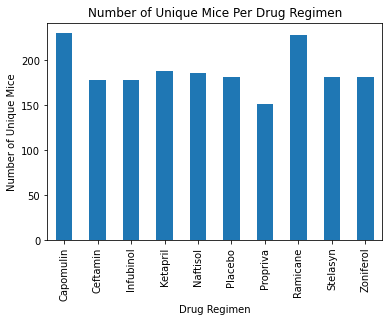

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
num_unique_mice.plot(kind="bar",title="Number of Unique Mice Per Drug Regimen", ylabel="Number of Unique Mice")


Text(0, 0.5, 'Number of Unique Mice')

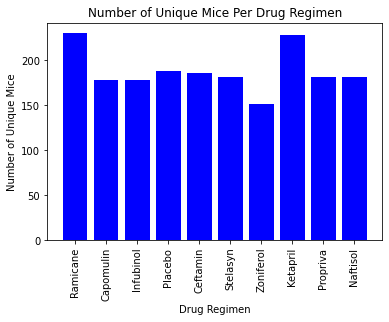

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(drug_regimen_list, num_unique_mice, color="blue", alpha=1, align="center")
plt.xticks(rotation="vertical")

plt.title('Number of Unique Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')

<AxesSubplot:title={'center':'Distribution of Male Vs Female'}, ylabel='Sex'>

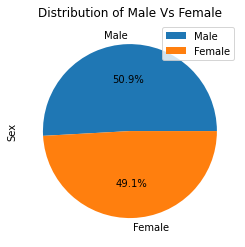

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaned_mice_data["Sex"].value_counts()

gender_count.plot(kind="pie", title="Distribution of Male Vs Female", legend=True, autopct='%1.1f%%')



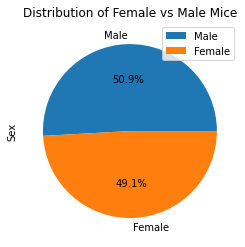

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")
plt.legend(labels)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
